The Mayor would like to understand the types of non-emergency municipal issues facing the residents of her/his city coming in via the 311 calls

Based on the data, how will you go about developing a framework to identify and solve the problems residents are facing, and what are some of the low hanging fruits that you would like to target?

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Abbreviation notes:
DOMI = Department of Mobility and Infrastructure

DPW = Department of Public Works

PLI = Permits, Licenses, and Inspections

In [218]:
Pitt = pd.read_csv('ServreqPitt.csv')

In [219]:
Pitt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287288 entries, 0 to 287287
Data columns (total 17 columns):
REQUEST_ID               287288 non-null int64
CREATED_ON               287288 non-null object
REQUEST_TYPE             287288 non-null object
REQUEST_ORIGIN           287288 non-null object
STATUS                   287288 non-null int64
DEPARTMENT               285087 non-null object
NEIGHBORHOOD             265131 non-null object
COUNCIL_DISTRICT         265516 non-null float64
WARD                     265211 non-null float64
TRACT                    266336 non-null float64
PUBLIC_WORKS_DIVISION    265218 non-null float64
PLI_DIVISION             265211 non-null float64
POLICE_ZONE              265043 non-null float64
FIRE_ZONE                265364 non-null object
X                        268660 non-null float64
Y                        268660 non-null float64
GEO_ACCURACY             287288 non-null object
dtypes: float64(8), int64(2), object(7)
memory usage: 37.3+ MB


In [220]:
Pitt.keys()

Index(['REQUEST_ID', 'CREATED_ON', 'REQUEST_TYPE', 'REQUEST_ORIGIN', 'STATUS',
       'DEPARTMENT', 'NEIGHBORHOOD', 'COUNCIL_DISTRICT', 'WARD', 'TRACT',
       'PUBLIC_WORKS_DIVISION', 'PLI_DIVISION', 'POLICE_ZONE', 'FIRE_ZONE',
       'X', 'Y', 'GEO_ACCURACY'],
      dtype='object')

In [221]:
Pitt['DPW'] = Pitt['DEPARTMENT'].str.contains('DPW', na = False, regex=True)
Pitt['POLICE'] = Pitt['DEPARTMENT'].str.contains('Police', na = False, regex=True)
Pitt['DOMI'] = Pitt['DEPARTMENT'].str.contains('DOMI', na = False, regex=True)
Pitt['PLI'] = Pitt['DEPARTMENT'].str.contains('Permits, Licenses and Inspections|PLI', na = False, regex=True)
Pitt['CREATED_ON'] = pd.to_datetime(Pitt['CREATED_ON'], format = '%Y%m%dT%H:%M:%S')


In [249]:
len(Pitt[(Pitt.Y == 0)])
# Long enough data set to drop

2296

In [223]:
Pitt.groupby('REQUEST_TYPE')['DEPARTMENT'].count().sort_values(ascending = False).head(20)

REQUEST_TYPE
Potholes                                41169
Weeds/Debris                            25309
Building Maintenance                    13815
Snow/Ice removal                         9063
Refuse Violations                        8271
Abandoned Vehicle (parked on street)     8034
Missed Pick Up                           6264
Litter                                   6041
Replace/Repair a Sign                    5725
Illegal Parking                          5605
Building Without a Permit                5348
Street Light - Repair                    5333
Overgrowth                               4710
City Source (CDBG)                       4398
Paving Request                           4244
Pruning (city tree)                      3945
Vacant Building                          3561
Referral                                 3151
Rodent control                           2987
Request New Sign                         2811
Name: DEPARTMENT, dtype: int64

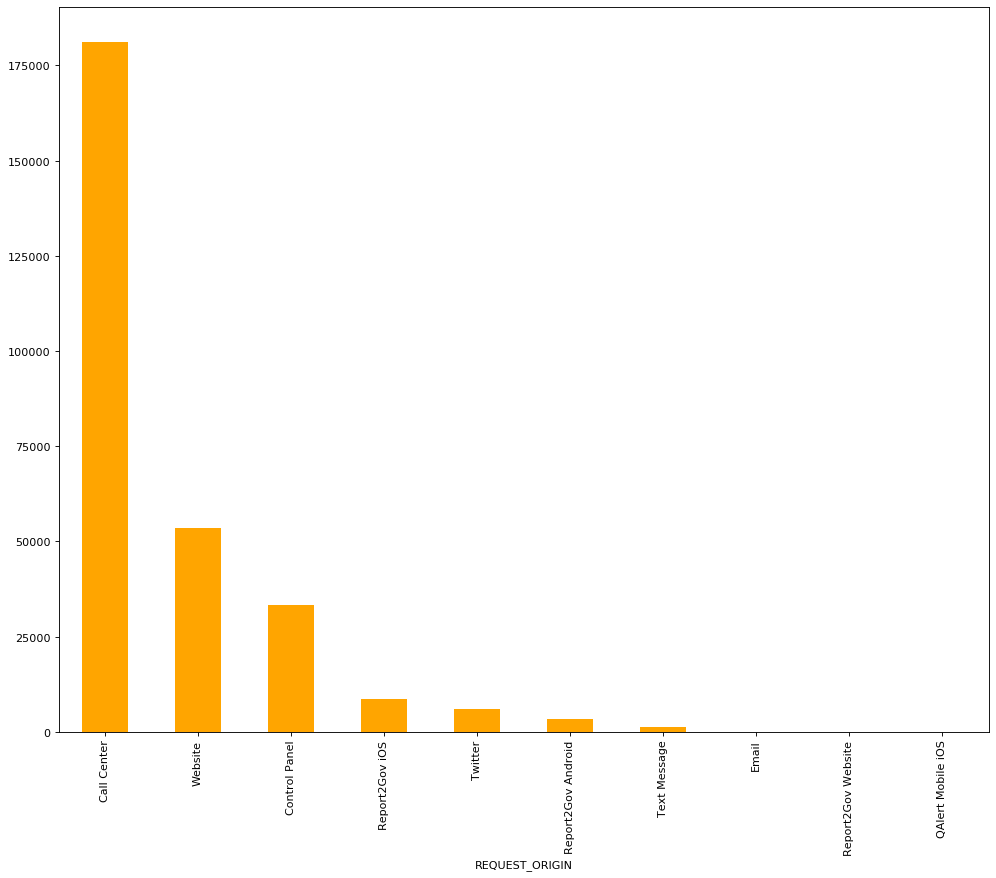

In [224]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
Pitt.groupby('REQUEST_ORIGIN')['REQUEST_ORIGIN'].count().sort_values(ascending = False).plot(kind= 'bar', color = 'orange')

In [225]:
sum(Pitt.groupby('REQUEST_ORIGIN')['REQUEST_ORIGIN'].count().sort_values(ascending = False).head(5))/sum(Pitt.groupby('REQUEST_ORIGIN')['REQUEST_ORIGIN'].count())

0.9835252429617666

In [226]:
sum(Pitt.groupby('REQUEST_ORIGIN')['REQUEST_ORIGIN'].count().sort_values(ascending = False).head(3))/sum(Pitt.groupby('REQUEST_ORIGIN')['REQUEST_ORIGIN'].count())

0.9330462810837905

98.35% of reports come from the top 5 sources. Maybe trim some fat

Reports are important, but services require maintanence and money. Maybe it is worthwhile to only 

In [227]:
Pitt.groupby('DEPARTMENT')['DEPARTMENT'].count().sort_values(ascending = False)

DEPARTMENT
DPW - Street Maintenance                              76938
Permits, Licenses and Inspections                     66036
DPW - Refuse                                          20384
Police - Zones 1-6                                    16051
DOMI - Permits                                        11548
Pittsburgh Water and Sewer Authority                  11400
DOMI - TrafficShop                                    10147
311                                                    9319
DPW - Forestry Division                                8449
Police - AVU                                           8428
Animal Care & Control                                  7903
DOMI - Traffic                                         7230
DOMI - Asphalt                                         5775
Allegheny City Electric                                5354
City Source Associates, Inc.                           4398
DPW - Park Maintenance                                 2833
DOMI - Streets               

In [228]:
loc = pd.DataFrame([Pitt.X,Pitt.Y]).transpose().dropna()

In [229]:
loc.Y

0         40.388412
1         40.466358
2         40.457074
3         40.471775
4         40.443240
            ...    
287283    40.472198
287284    40.470454
287285    40.410775
287286    40.383494
287287    40.414882
Name: Y, Length: 268660, dtype: float64

In [230]:
loc.keys()

Index(['X', 'Y'], dtype='object')

In [231]:
loc_1 = loc.set_index(loc.X ,drop = True)
loc_1 = loc_1.drop(axis = 1, columns = 'X')


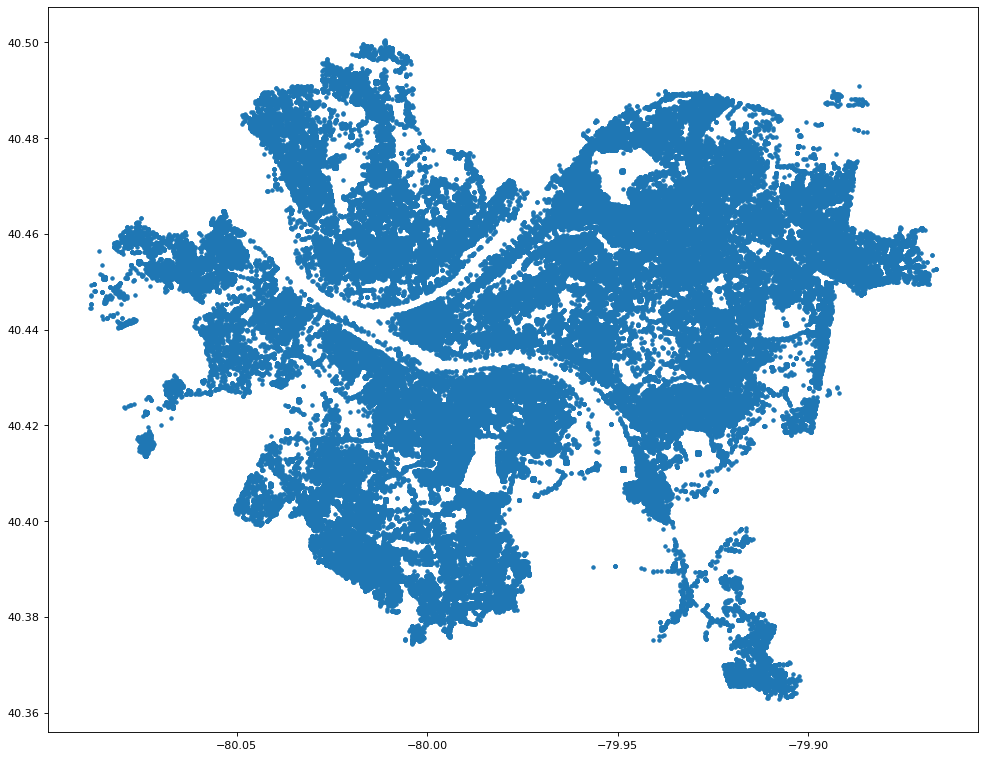

In [232]:
from matplotlib.pyplot import figure
Plt_Pitt = Pitt.dropna()
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Plt_Pitt.X,Plt_Pitt.Y, ls = 'none', marker = '.')
plt.show()

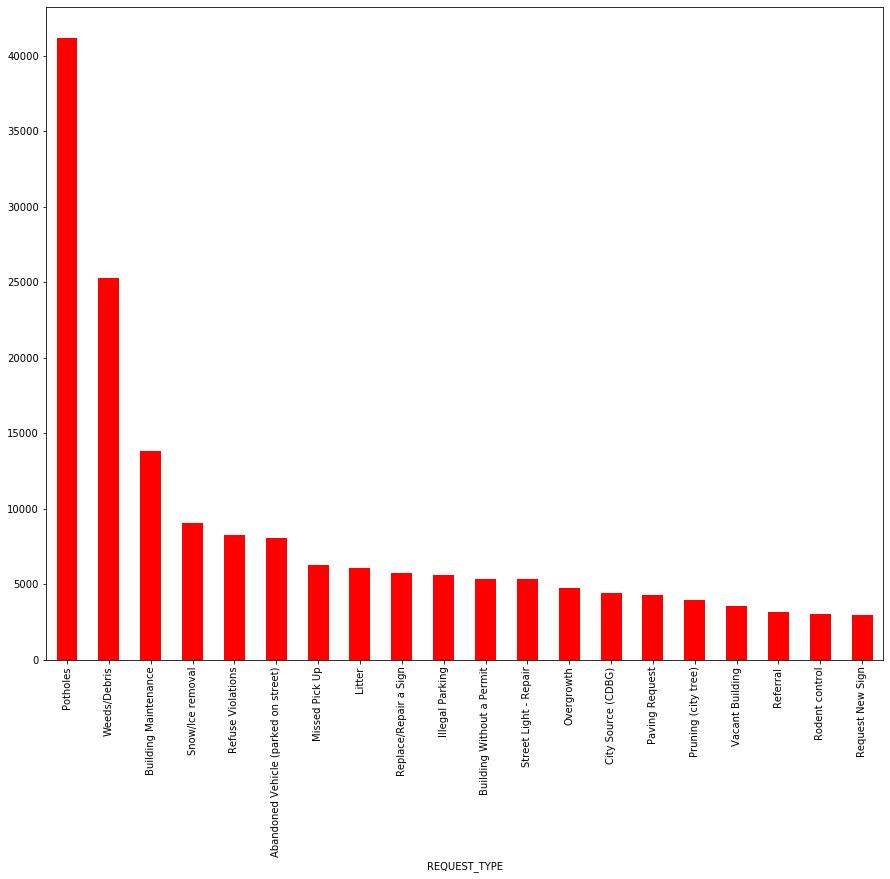

In [233]:
figure(num=None, figsize=(15, 12))
Pitt.groupby('REQUEST_TYPE')['REQUEST_TYPE'].count().sort_values(ascending = False).head(20).plot(kind = 'bar', color = 'red')

# DPW

In [255]:
DPW = Pitt[(Pitt['DPW']==True)]
DPW.groupby('REQUEST_TYPE')['REQUEST_TYPE'].count().sort_values(ascending = False).head()

REQUEST_TYPE
Potholes             40407
Snow/Ice removal      9063
Refuse Violations     8271
Missed Pick Up        6264
Litter                6041
Name: REQUEST_TYPE, dtype: int64

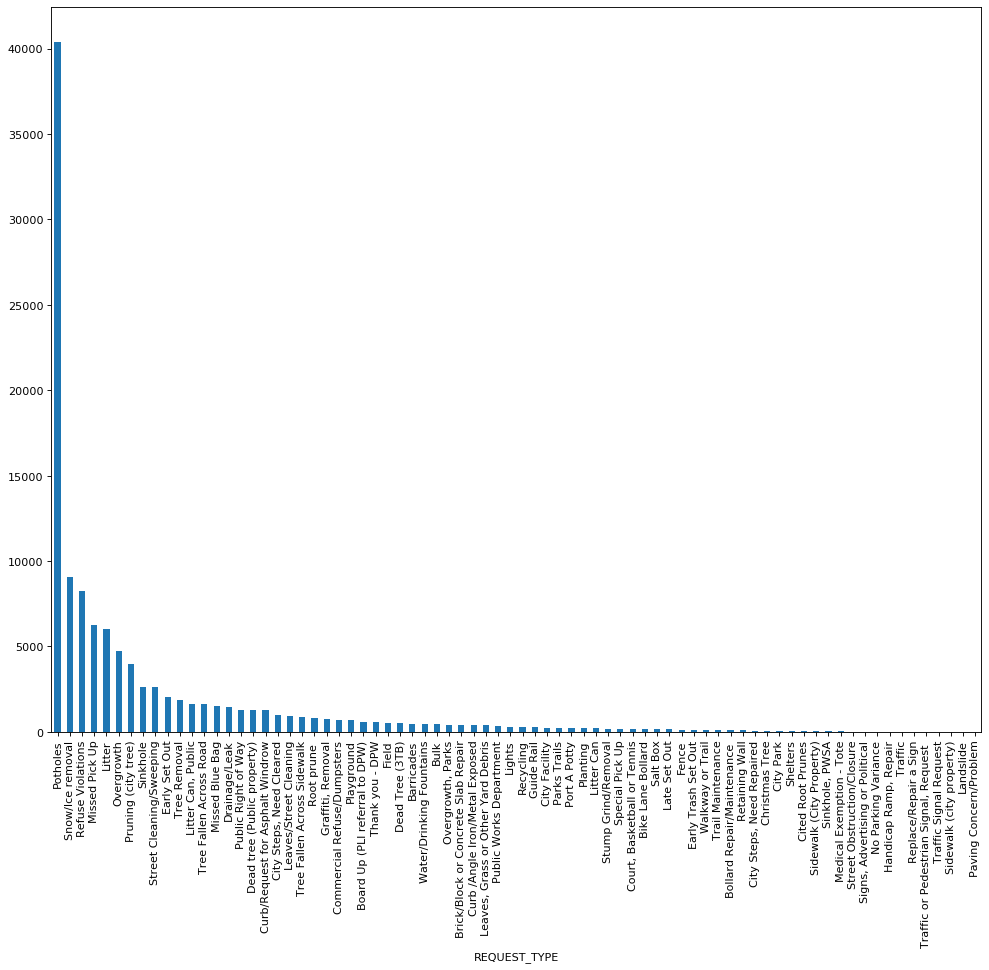

In [256]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
DPW.groupby('REQUEST_TYPE')['REQUEST_TYPE'].count().sort_values(ascending = False).plot(kind='bar')

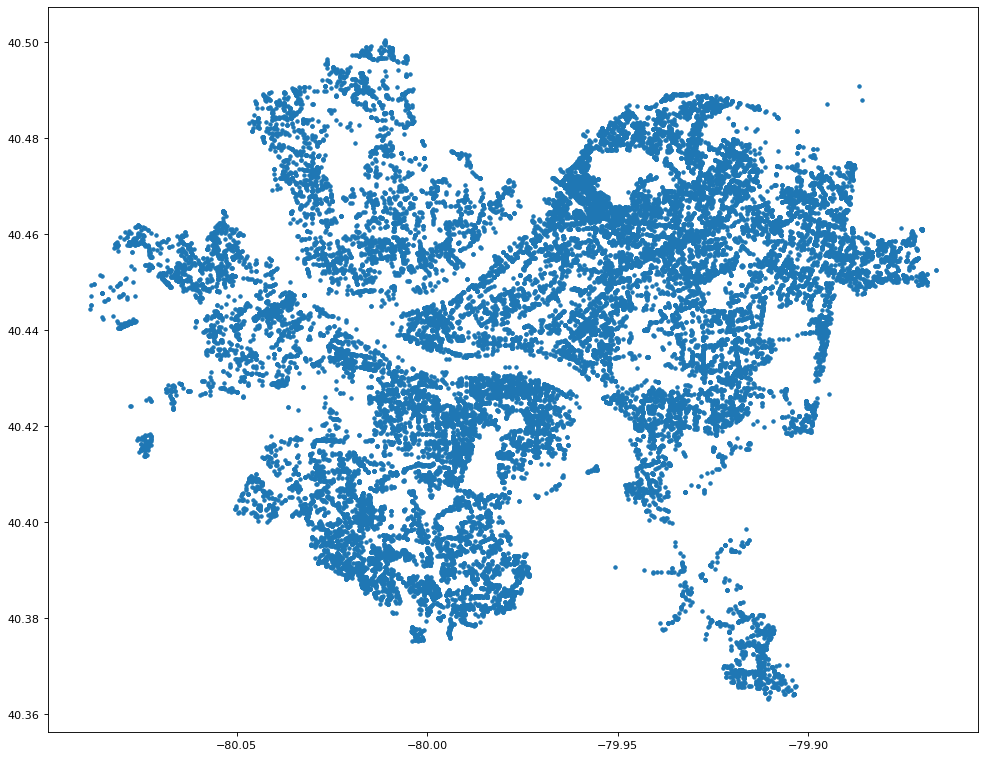

In [236]:
Potholes = Pitt[(Pitt['REQUEST_TYPE']=='Potholes')]
C_Potholes = Potholes.dropna()
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(C_Potholes.X,C_Potholes.Y, ls = 'none', marker = '.')#, hue = C_Potholes.PUBLIC_WORKS_DIVISION)
plt.show()

# PLI

In [237]:
PLI = Pitt[(Pitt['PLI']==True)]
PLI.groupby('REQUEST_TYPE')['REQUEST_TYPE'].count().sort_values(ascending = False).head()

REQUEST_TYPE
Weeds/Debris                 25309
Building Maintenance         13815
Building Without a Permit     5348
Vacant Building               3561
Sign                          2449
Name: REQUEST_TYPE, dtype: int64

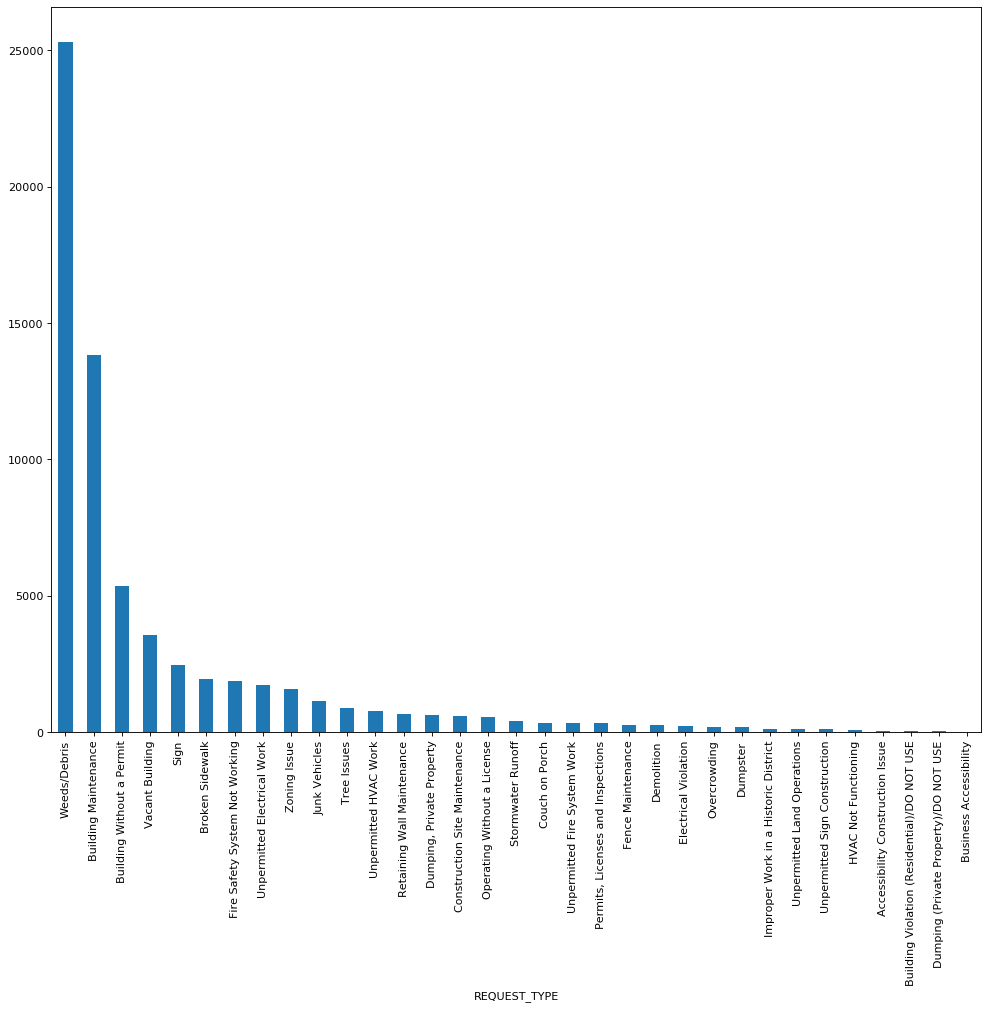

In [254]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
PLI.groupby('REQUEST_TYPE')['REQUEST_TYPE'].count().sort_values(ascending = False).plot(kind='bar')

In [238]:
Weeds = PLI[(PLI['REQUEST_TYPE']=='Weeds/Debris')].dropna()
Weeds.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,...,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY,DPW,POLICE,DOMI,PLI
21,234279,2018-04-01 10:51:00,Weeds/Debris,Report2Gov iOS,1,"Permits, Licenses and Inspections",Elliott,2.0,20.0,4.200356e+10,...,20.0,6.0,1-17,-80.039830,40.442890,EXACT,False,False,False,True
30,168617,2017-07-10 12:36:00,Weeds/Debris,Call Center,1,"Permits, Licenses and Inspections",Central Business District,6.0,1.0,4.200302e+10,...,1.0,2.0,1-4,-80.001775,40.438681,EXACT,False,False,False,True
71,168338,2017-07-09 19:25:00,Weeds/Debris,Website,1,"Permits, Licenses and Inspections",Perry North,1.0,26.0,4.200326e+10,...,26.0,1.0,1-15,-80.010890,40.485040,EXACT,False,False,False,True
83,101113,2016-08-31 08:51:00,Weeds/Debris,Call Center,3,"Permits, Licenses and Inspections",Manchester,6.0,21.0,4.200321e+10,...,21.0,1.0,1-8,-80.029310,40.458475,EXACT,False,False,False,True
85,161970,2017-06-14 13:58:00,Weeds/Debris,Call Center,3,"Permits, Licenses and Inspections",Fineview,1.0,25.0,4.200325e+10,...,25.0,1.0,1-10,-80.005011,40.463905,EXACT,False,False,False,True


In [239]:
Weeds.groupby('PLI_DIVISION')['PLI_DIVISION'].count().sort_values(ascending = False).head(5)

PLI_DIVISION
19.0    2168
20.0    2062
16.0    1662
13.0    1336
29.0    1309
Name: PLI_DIVISION, dtype: int64

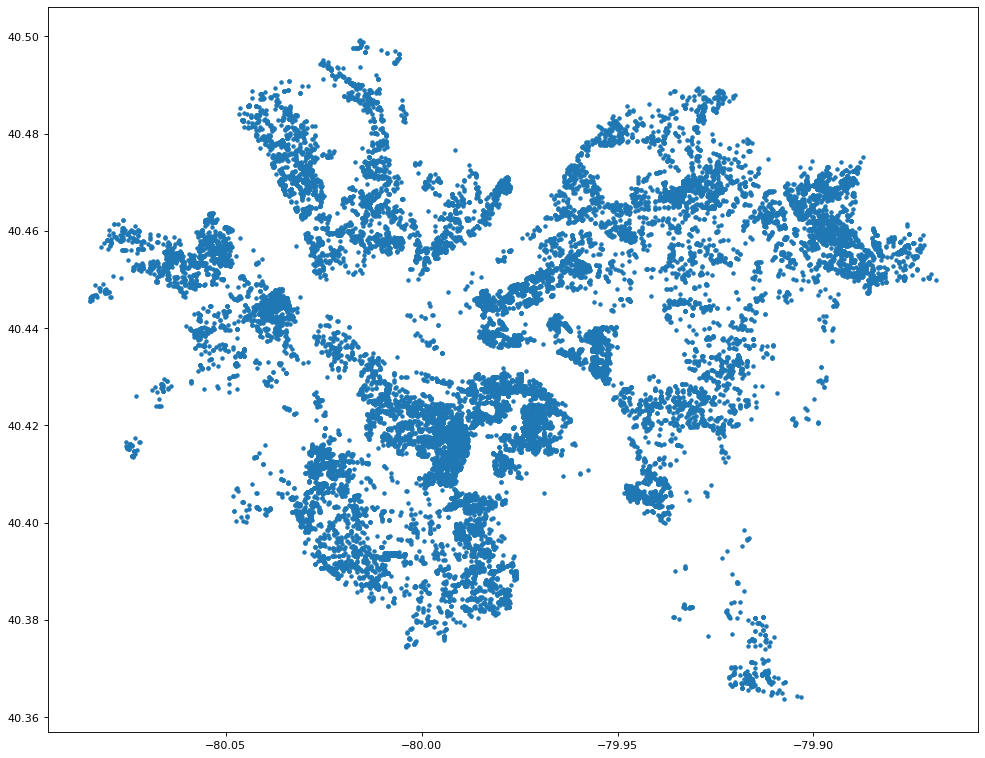

In [240]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Weeds.X,Weeds.Y, ls = 'none', marker = '.')
plt.show()

# DOMI

In [241]:
DOMI = Pitt[(Pitt['DOMI']==True)]
DOMI.groupby('REQUEST_TYPE')['REQUEST_TYPE'].count().sort_values(ascending = False).head()

REQUEST_TYPE
Replace/Repair a Sign                   5723
Paving Request                          4244
Request New Sign                        2811
Illegal Dumping                         2629
Traffic or Pedestrian Signal, Repair    2219
Name: REQUEST_TYPE, dtype: int64

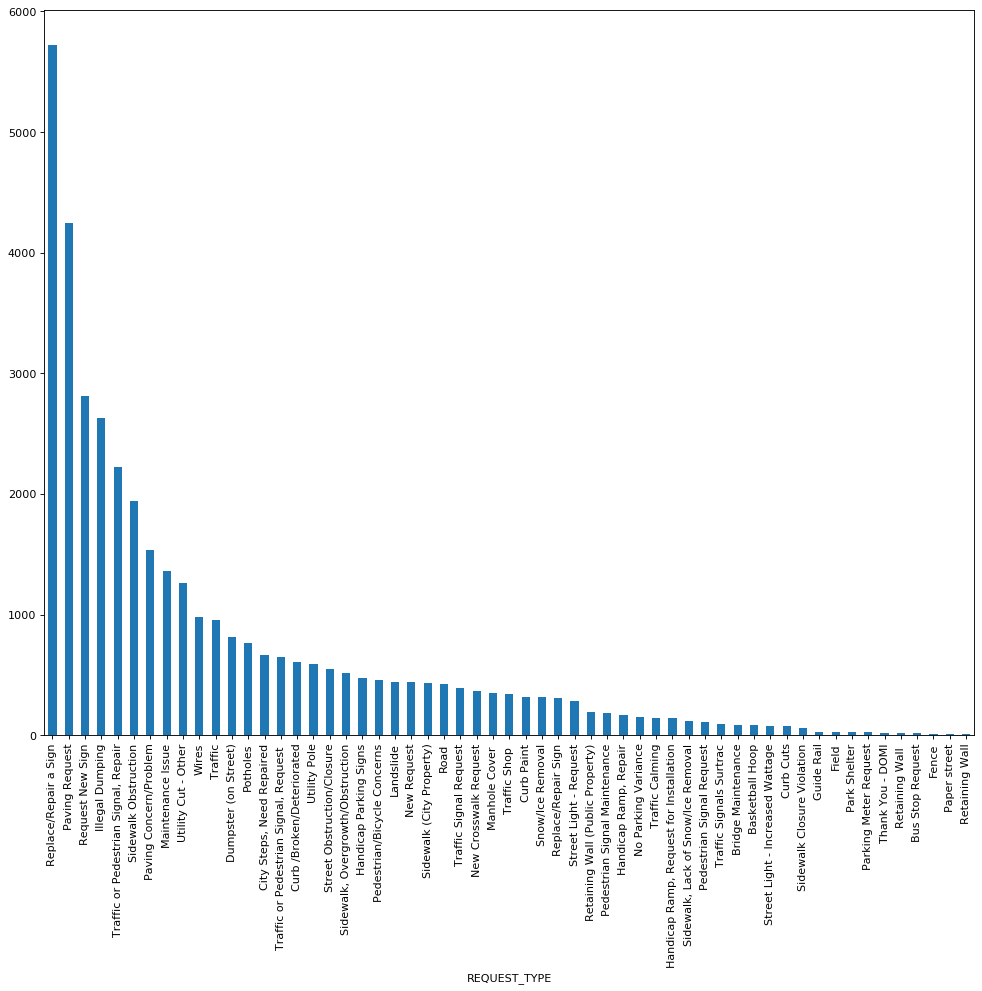

In [253]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
DOMI.groupby('REQUEST_TYPE')['REQUEST_TYPE'].count().sort_values(ascending = False).plot(kind='bar')

In [242]:
Sign = DOMI[(DOMI['REQUEST_TYPE']=='Replace/Repair a Sign')]
Sign.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,...,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY,DPW,POLICE,DOMI,PLI
48,168628,2017-07-10 12:55:00,Replace/Repair a Sign,Twitter,1,DOMI - TrafficShop,South Side Flats,3.0,17.0,4.200317e+10,...,17.0,3.0,4-2,-79.992238,40.428617,EXACT,False,False,True,False
166,7025,2015-06-01 09:06:00,Replace/Repair a Sign,Call Center,1,DOMI - TrafficShop,Overbrook,4.0,32.0,4.200332e+10,...,32.0,3.0,4-23,-79.993096,40.388300,EXACT,False,False,True,False
244,168052,2017-07-07 11:45:00,Replace/Repair a Sign,Call Center,1,DOMI - TrafficShop,Polish Hill,7.0,6.0,4.200306e+10,...,6.0,2.0,2-6,-79.961736,40.458775,EXACT,False,False,True,False
263,199269,2017-11-16 11:40:00,Replace/Repair a Sign,Call Center,1,DOMI - TrafficShop,Brookline,4.0,19.0,4.200319e+10,...,19.0,6.0,4-26,-80.015443,40.388107,EXACT,False,False,True,False
270,7043,2015-06-01 09:53:00,Replace/Repair a Sign,Call Center,1,DOMI - TrafficShop,Bloomfield,7.0,8.0,4.200308e+10,...,8.0,5.0,3-1,-79.950181,40.460071,EXACT,False,False,True,False


In [243]:
Sign.groupby('PLI_DIVISION')['PLI_DIVISION'].count().sort_values(ascending = False).head(5)

PLI_DIVISION
14.0    569
19.0    552
20.0    311
4.0     296
17.0    258
Name: PLI_DIVISION, dtype: int64

# Police

In [244]:
Popo = Pitt[(Pitt['POLICE']==True)]
Popo.groupby('REQUEST_TYPE')['REQUEST_TYPE'].count().sort_values(ascending = False).head()

REQUEST_TYPE
Abandoned Vehicle (parked on street)    8034
Illegal Parking                         5605
Patrol                                  2157
Excessive Noise/Disturbances            1870
Drug Enforcement                        1843
Name: REQUEST_TYPE, dtype: int64

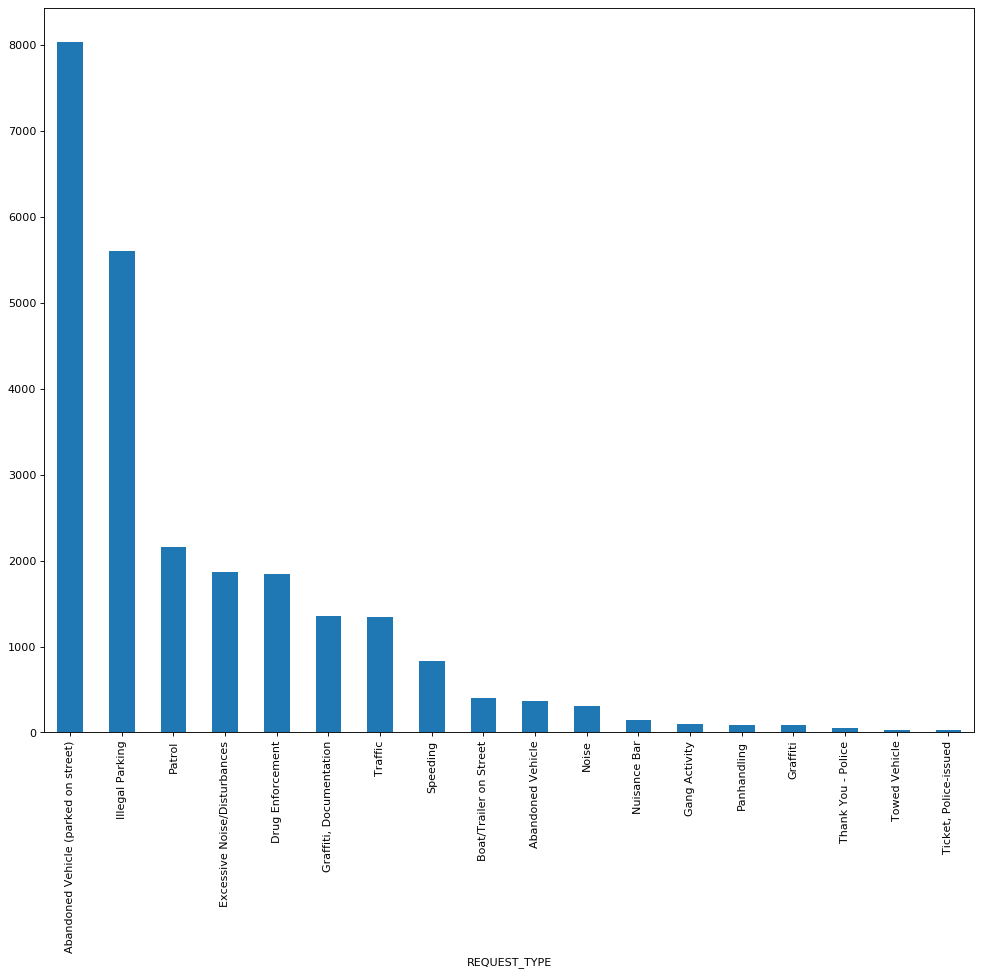

In [252]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
Popo.groupby('REQUEST_TYPE')['REQUEST_TYPE'].count().sort_values(ascending = False).plot(kind='bar')

In [245]:
Popo.CREATED_ON.head()

3    2017-07-10 14:30:00
13   2017-11-29 09:54:00
37   2017-02-08 14:48:00
39   2017-02-22 12:12:00
40   2017-03-09 13:12:00
Name: CREATED_ON, dtype: datetime64[ns]

In [246]:
Popo['CREATED_ON_1'] = pd.to_datetime(Popo['CREATED_ON'], format = '%Y%m%dT%H:%M:%S')

C:\Users\12104\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [248]:

#df.groupby(pd.TimeGrouper(freq='M'))

In [ ]:
Parking = Popo[(Popo['REQUEST_TYPE']=='Abandoned Vehicle (parked on street)')]
Parking.head()

In [ ]:
Parking.groupby('POLICE_ZONE')['POLICE_ZONE'].count().sort_values(ascending = False).head(5)

In [ ]:
figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Parking.X,Parking.Y, ls = 'none', marker = '.')
plt.show()